In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

from sklearn.svm import SVR

from sklearn.svm import SVC


from sklearn.model_selection import cross_val_score

%matplotlib inline

# Load data and clean

In [2]:
# load data
raw_data = pd.read_csv('epi_r.csv')

In [3]:
# what does the data look like?
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

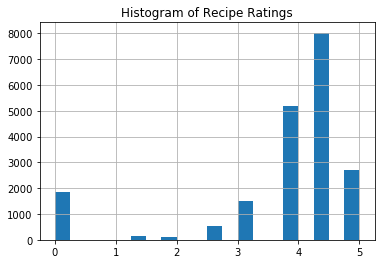

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [6]:
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [7]:
raw_data.shape

(20052, 680)

In [ ]:
# How many nans and zeros do we have for a given column?

In [8]:
counts = np.zeros(len(raw_data.columns))
for ii in range(0, len(raw_data.columns)):
    counts[ii] =  (raw_data.iloc[:,ii]==0.0).sum() + (raw_data.iloc[:,ii].isnull()).sum()

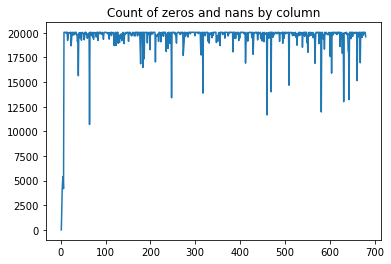

In [10]:
plt.plot(np.arange(1,counts.shape[0]+1), counts)
plt.title('Count of zeros and nans by column')
plt.show()

In [ ]:
# ARE the rating=0 items just not rated?

In [11]:
rating0 = raw_data[raw_data['rating']==0]

In [12]:
# for some of them there is nutritional information, but for others there isn't
rating0

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
25,Garlic Baguette Crumbs,0.0,95.0,1.0,7.0,103.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,Pastry Twists with Spiced Sugar-Honey Glaze,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,Honey Rye,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,Colin Perry’s Sorghum and Apple Sticky Pudding,0.0,523.0,8.0,19.0,694.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,Tomato-Infused Bulgur Pilaf with Fresh Basil,0.0,195.0,7.0,5.0,469.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,Bacon Crackers,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,Roast Chicken With Sorghum and Squash,0.0,1143.0,63.0,77.0,311.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,Parsley Mayo,0.0,306.0,0.0,34.0,302.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,Spicy Tomato Sauce,0.0,112.0,2.0,7.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,Chocolate Almond Butter,0.0,273.0,2.0,28.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# let's drop titles for which any of the features is nan
raw_dataNoNull = raw_data.dropna(axis=0, how='any')

In [14]:
raw_dataNoNull.shape

(15864, 680)

In [15]:
# about 25% of the data had nans
raw_data.shape

(20052, 680)

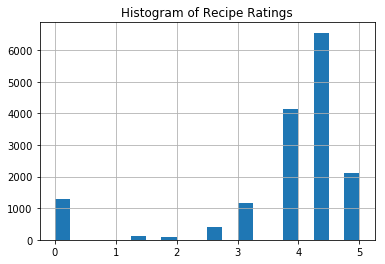

In [16]:
# what is the distribution of the ratings now?
raw_dataNoNull.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

# Identifying a small set of important features

We start with about 600 features and we need to find around 30 that are more useful. 

In [ ]:
# check which features seem to matter by using Lasso Logistic Regression

In [17]:
X = raw_dataNoNull.drop(['rating', 'title'], axis=1)
Y = (100*raw_dataNoNull['rating']).astype(int) # to essentially make it into a categorical variable

In [18]:
XX = pd.DataFrame(preprocessing.scale(X), index=X.index, columns=X.columns)

In [19]:
X_train = XX.copy()
Y_train = Y.copy()

In [20]:
smallC = np.arange(0.01,1.0,0.1).reshape(-1,1)
cVec = smallC
estimatesLasso = np.nan*np.zeros(shape=[len(cVec),len(list(X_train.columns))+2])

In [25]:
# run logistic regression and add up the absolute value of the coefficients across the 8 classes 
for ii in range(0,len(cVec)):
    cc = cVec[ii][0]
    
    lasso = LogisticRegression(penalty='l1', C=cc, fit_intercept=True, multi_class='ovr')
    lasso.fit(X_train, Y_train)
    estimatesLasso[ii, :-2] = abs(lasso.coef_).sum(axis=0)
    estimatesLasso[ii, -2] = cc
    estimatesLasso[ii, -1] = lasso.score(X_train, Y_train)

In [26]:
#let's see the evolution of the accuracy over C
estimatesLasso[:,-1]

array([ 0.44263742,  0.49426374,  0.49672214,  0.49691125,  0.49798285,
        0.49836107,  0.49899143,  0.49899143,  0.49930661,  0.49880232])

Not great by any means, but better than SVR before. Either way, I am looking for some useful features

How big are the "coefficients" in these regressions?

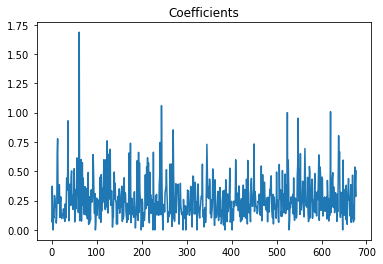

In [29]:
plt.plot(estimatesLasso[3,:-2])
plt.title('Coefficients')
plt.show()

we want to select the top 30 or so (this because the exercise asked for 30). 

In [38]:
nzIdx = np.where(estimatesLasso[1,:-2]>0.35)

In [39]:
len(nzIdx[0])

31

In [40]:
candImpFeatures = X_train.columns[list(nzIdx[0])]

In [41]:
candImpFeatures

Index(['alcoholic', 'almond', 'bake', 'bon appétit', 'braise', 'bread',
       'cheese', 'chicken', 'chile pepper', 'cilantro', 'cornmeal', 'drink',
       'edible gift', 'fall', 'goat cheese', 'gourmet', 'harpercollins',
       'healthy', 'low carb', 'mustard', 'no sugar added', 'pasta',
       'quick & easy', 'roast', 'sauce', 'sauté', 'shrimp', 'stir-fry',
       'thanksgiving', 'vegan', 'vegetable'],
      dtype='object')

Should we exclude rating=0 or include it? 

In [42]:
dataNoZero = raw_dataNoNull[raw_dataNoNull['rating']>0]

In [43]:
dataNoZero['rating'].describe()

count    14568.000000
mean         4.095535
std          0.655129
min          1.250000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

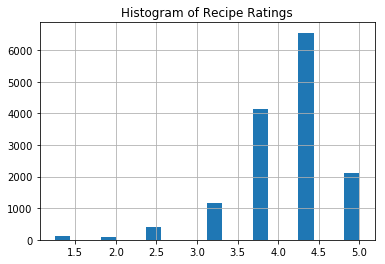

In [44]:
dataNoZero.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [45]:
raw_dataNoNull['rating'].describe()

count    15864.000000
mean         3.760952
std          1.285518
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

In [47]:
# define great and bad
data = raw_dataNoNull[(raw_dataNoNull['rating'] >=4.375) |(raw_dataNoNull['rating'] <=3.75)]

In [48]:
data2 = data.copy()
data2['rating'] = np.where(data['rating']>=4.375, 1, 0)

In [49]:
data2['rating'].sum()/data2.shape[0]

0.54576399394856279

we have a relative balanced set of great recipies and not great recipies. 

In [50]:
X2 = data2[candImpFeatures]
Y2 = data2['rating']

In [51]:
XX2 = pd.DataFrame(preprocessing.scale(X2), index=X2.index, columns=X2.columns)

In [52]:
X_train2 = XX2.copy()
Y_train2 = Y2.copy()

let us run a SVM (using on the 30-some features identified above) and see what we get

In [53]:
svm = SVC(C=1)

In [54]:
svm.fit(X_train2, Y_train2)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
svm.score(X_train2, Y_train2)

0.62128088754412503

In [56]:
cross_val_score(svm, X_train2, Y_train2, cv=5)

array([ 0.57876497,  0.59502049,  0.56980775,  0.59930643,  0.58322825])

The numbers above are not good. The unconditional accuracy is 54% and here we get 56-59%. They are better than the SVR, but not good. 

Let's try a few more specifications, with higher C. This higher C will penalize the errors more and should lead to a better fit, at least in sample. 

In [57]:
svm10 = SVC(C=10)
svm10.fit(X_train2, Y_train2)
svm10.score(X_train2, Y_train2)
cross_val_score(svm10, X_train2, Y_train2, cv=5)

array([ 0.56521739,  0.58556571,  0.56224393,  0.58448928,  0.58070618])

These numbers are not much better. Let's try Lasso Logistic Regression to see what results we get.

In [59]:
llr = LogisticRegression(penalty='l1', C=1,fit_intercept=True)

In [60]:
llr.fit(X_train2, Y_train2)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
llr.score(X_train2, Y_train2)

0.58598083711548155

In [62]:
cross_val_score(llr, X_train2, Y_train2, cv=5)

array([ 0.56647763,  0.59060826,  0.58430507,  0.58039092,  0.59836066])

We get similar results. 

In [ ]:
For the sake of completion let's look at the confusion matrix.

In [63]:
confusion_matrix(Y_train2, svm.predict(X_train2),labels=np.array([1,0]))

array([[6892, 1766],
       [4242, 2964]])

Questions
1. Other ideas to narrow down useful features?
2. Is 56-59% good enough? I mean 54% of the values are 1 anyway...
3. I would also try to look at the names of the features and see whether I get something. 
4. Reduce even further the number of features?

For instance, I could use just the nutritional information

In [65]:
X3 = data2[['calories','fat','protein','fat','sodium']]
Y3 = data2['rating']

In [66]:
XX3 = pd.DataFrame(preprocessing.scale(X3), index=X3.index, columns=X3.columns)
X_train3 = XX3.copy()
Y_train3 = Y3.copy()

In [67]:
svmN = SVC(C=1)

In [68]:
svmN.fit(X_train3, Y_train3)
svmN.score(X_train3, Y_train3)

0.54589006555723651

In [69]:
cross_val_score(svmN, X_train3, Y_train3, cv=5)

array([ 0.54568368,  0.54585566,  0.54585566,  0.54571248,  0.54571248])

These numbers are pretty much at the unconditional accuracy. 